In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
all_movies_df = pd.read_csv('../cleaned_data/cleaned_movie_data.csv')
movies_df = pd.read_csv('../cleaned_data/movies_small.csv')
ratings_df = pd.read_csv('../cleaned_data/ratings_small.csv')
ratings_df.rename(columns={'rating': 'user_rating'}, inplace=True)
merged_df = pd.merge(ratings_df, movies_df, on='movie_id')

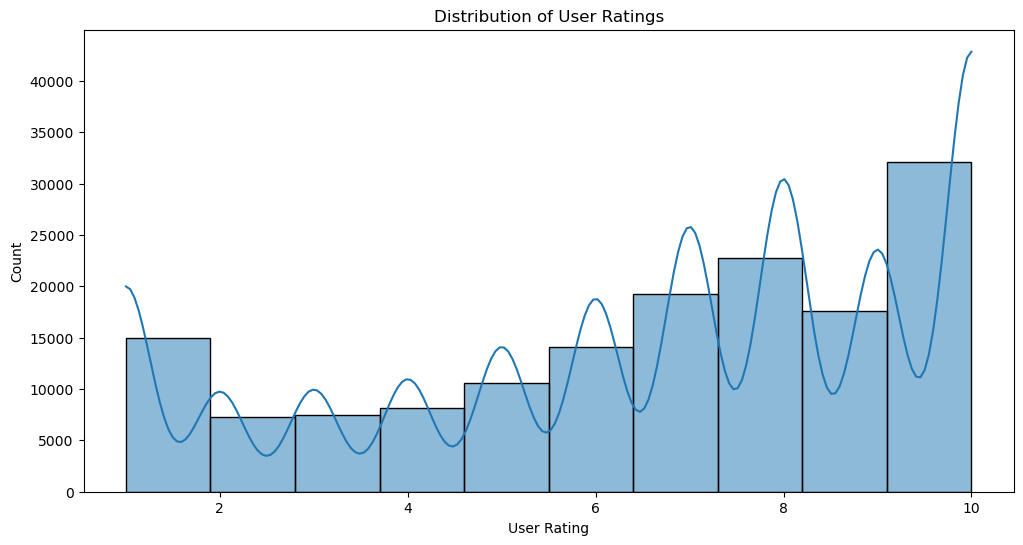

In [3]:
# 1. Distribution of user ratings
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['user_rating'], kde=True, bins=10)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.show()

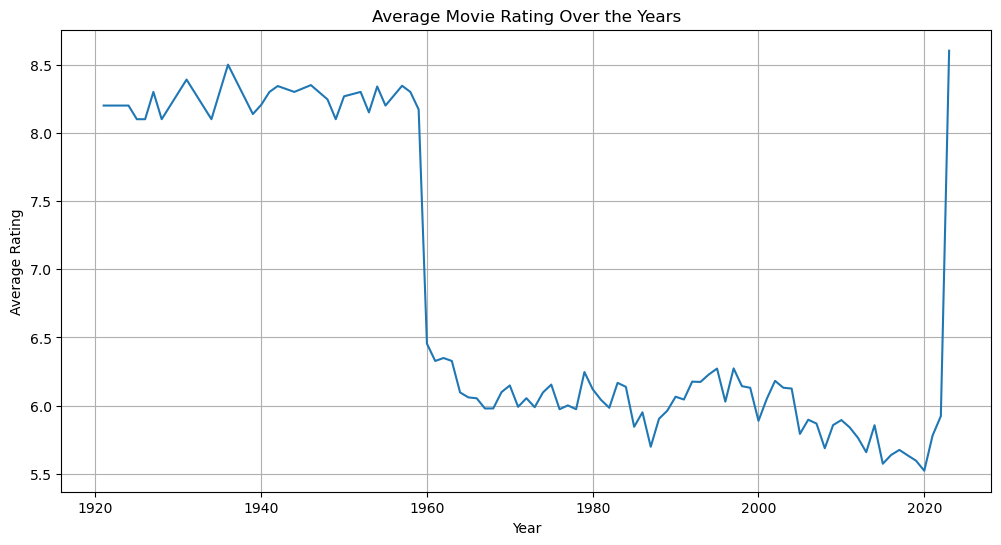

In [4]:
# 2. Average rating of movies over the years
avg_ratings_year = merged_df.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(avg_ratings_year['year'], avg_ratings_year['rating'], linestyle='-')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

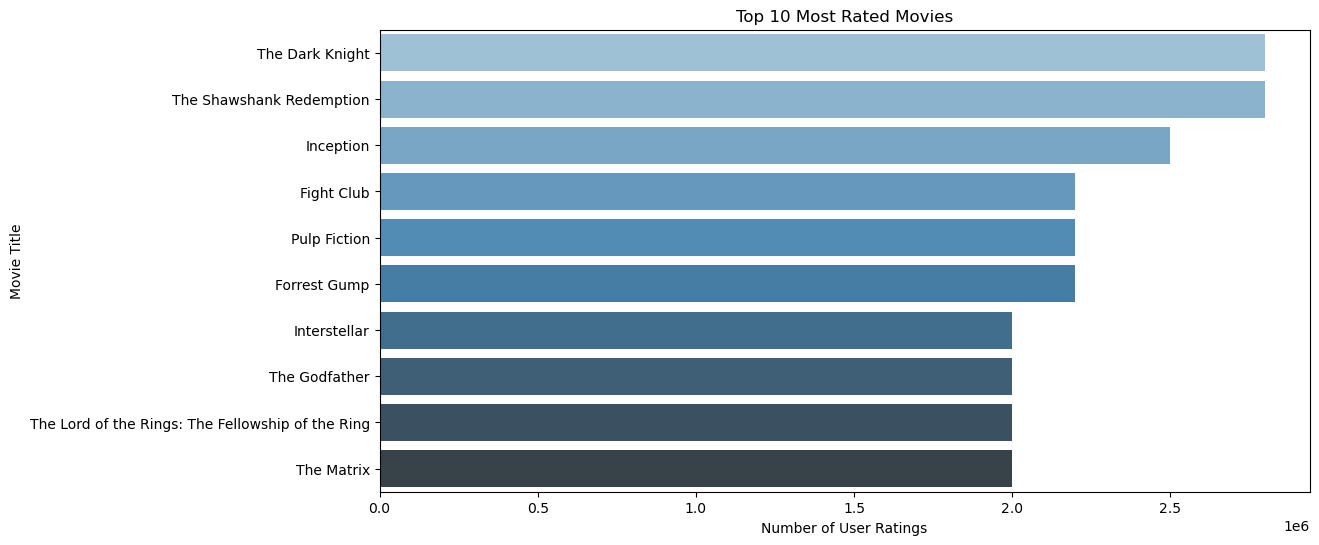

In [5]:
# 3. Top 10 most rated movies
top_rated_movies_corrected = all_movies_df[['title', 'num_rating']].sort_values(by='num_rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_movies_corrected['num_rating'], y=top_rated_movies_corrected['title'], palette='Blues_d')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of User Ratings')
plt.ylabel('Movie Title')
plt.show()

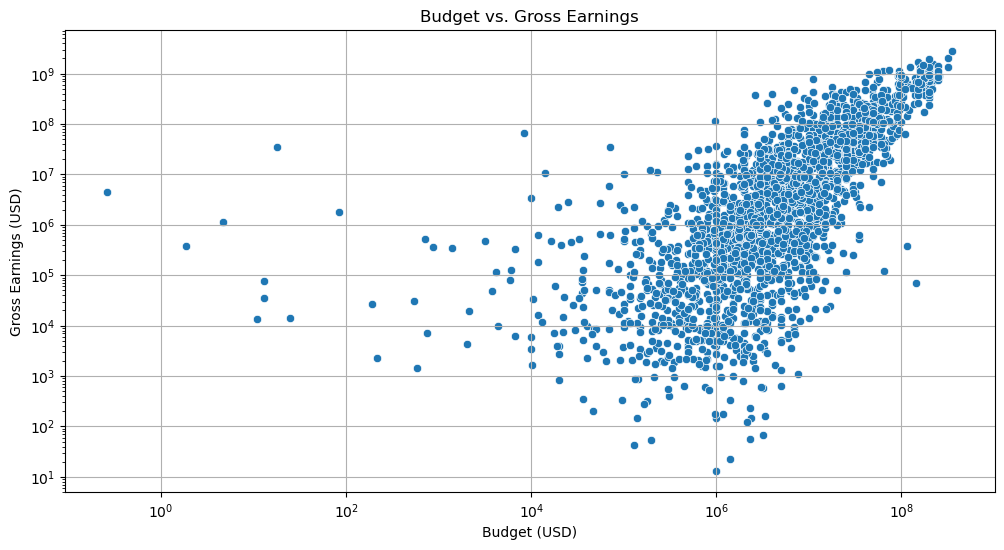

In [6]:
# 4. Relationship between budget and gross earnings for movies
# Filtering out movies without budget or gross information
budget_gross_df = movies_df[(movies_df['budget_usd'] > 0) & (movies_df['gross_usd'] > 0)]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget_usd', y='gross_usd', data=budget_gross_df)
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Earnings (USD)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

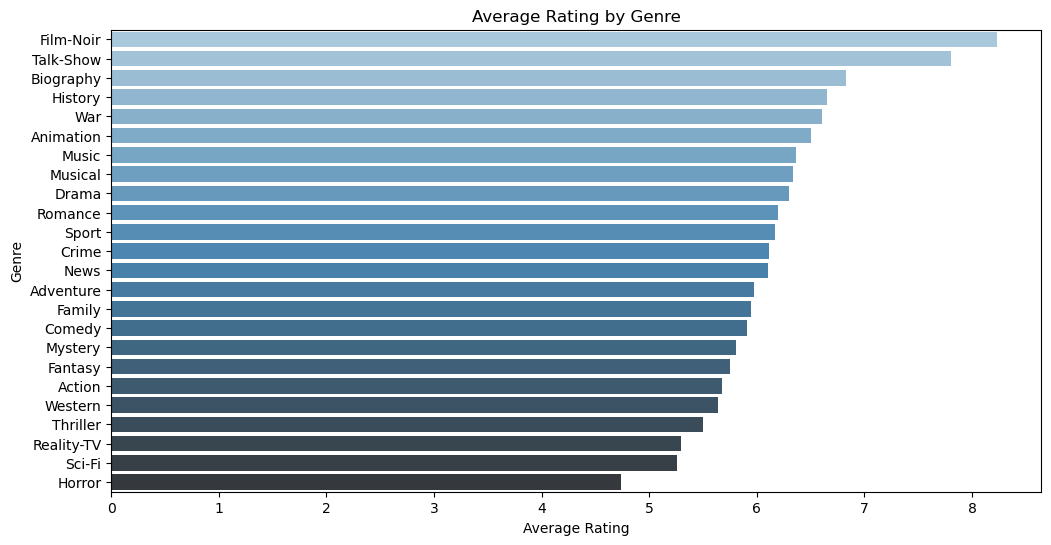

In [7]:
# 5. Average rating by genre
genres = movies_df['genres'].apply(lambda x: x.split(','))
genres_list = []
for genre in genres:
    genres_list.extend(genre)
unique_genres = list(set(genres_list))

genre_rating = {}
for genre in unique_genres:
    genre_rating[genre] = merged_df[merged_df['genres'].apply(lambda x: genre in x)]['rating'].mean()

sorted_genre_rating = sorted(genre_rating.items(), key=lambda x: x[1], reverse=True)
genres, ratings = zip(*sorted_genre_rating)

plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(ratings), y=np.array(genres), palette='Blues_d')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

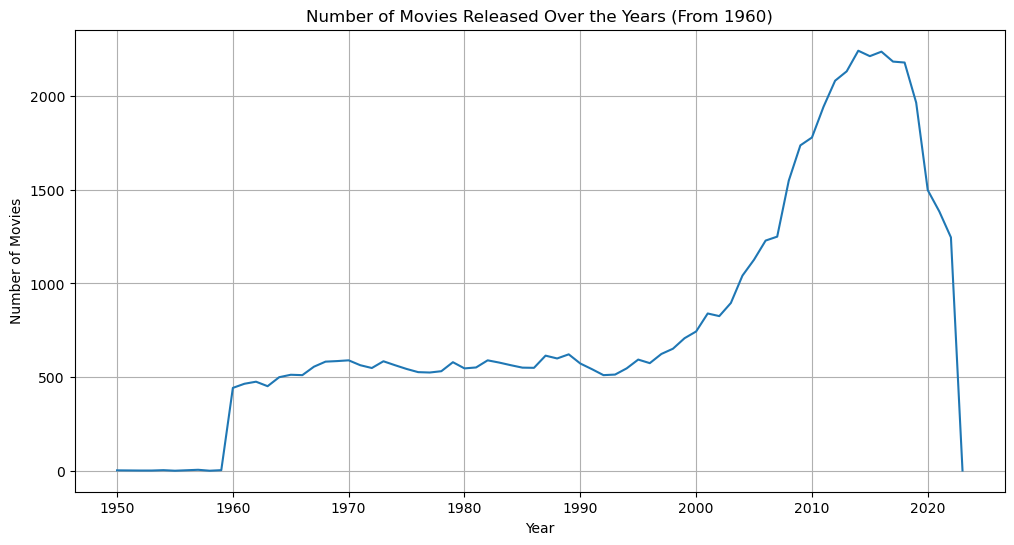

In [8]:
# 6. Number of movies released over the years from 1950
movies_from_1950 = all_movies_df[all_movies_df['year'] >= 1950]

movies_per_year = movies_from_1950.groupby('year')['title'].count()

plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released Over the Years (From 1960)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

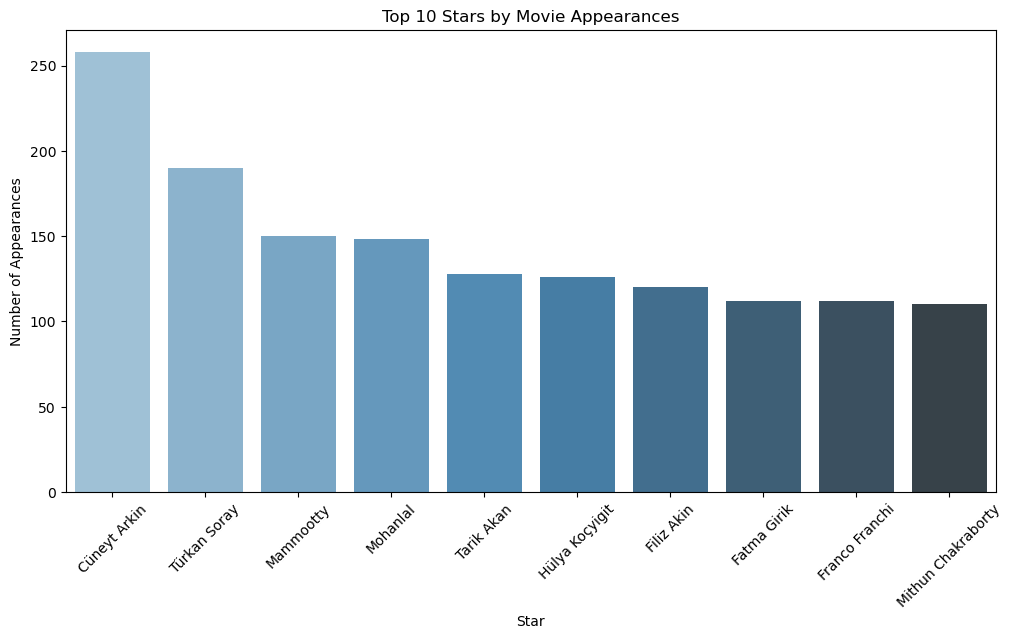

In [9]:
# 7. Top 10 stars by their appearance in movies
all_movies_df['stars'] = all_movies_df['stars'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

list_of_stars = sum(all_movies_df['stars'], [])

star_counts_corrected = pd.Series(list_of_stars).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=star_counts_corrected.index, y=star_counts_corrected.values, palette='Blues_d')
plt.title('Top 10 Stars by Movie Appearances')
plt.xlabel('Star')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.show()

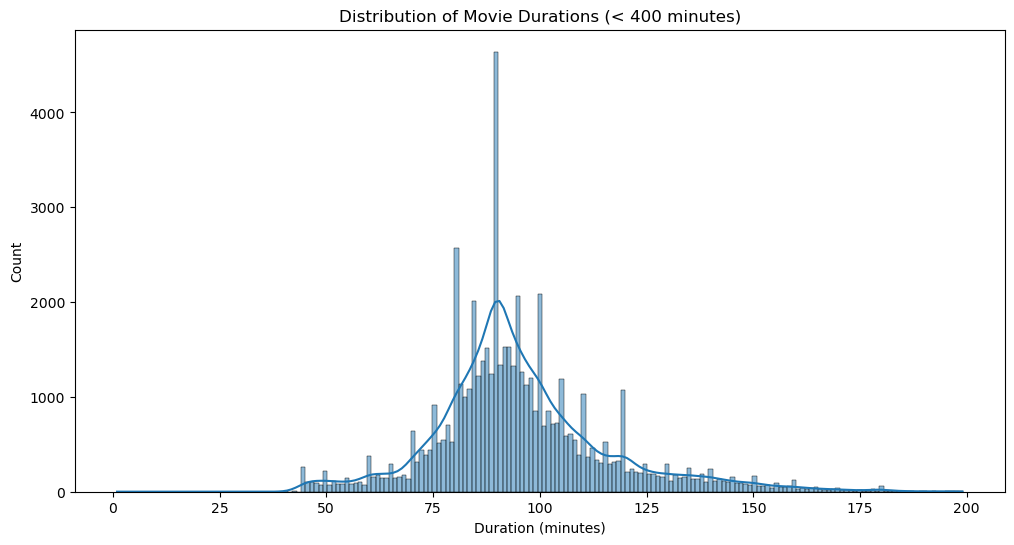

In [10]:
# 8. Distribution of movie durations
filtered_movies = all_movies_df[all_movies_df['duration'] < 200]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_movies['duration'].dropna(), kde=True, palette='Blues_d')
plt.title('Distribution of Movie Durations (< 400 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

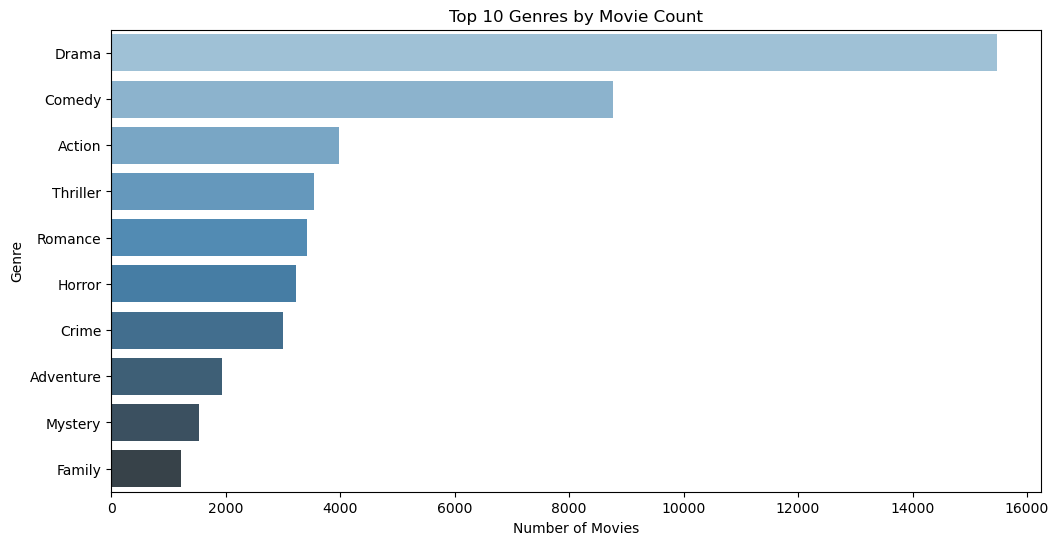

In [11]:
# 9. Proportion of movies by genre
genre_counts = Counter(genres_list)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts_df.head(10), palette='Blues_d')
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

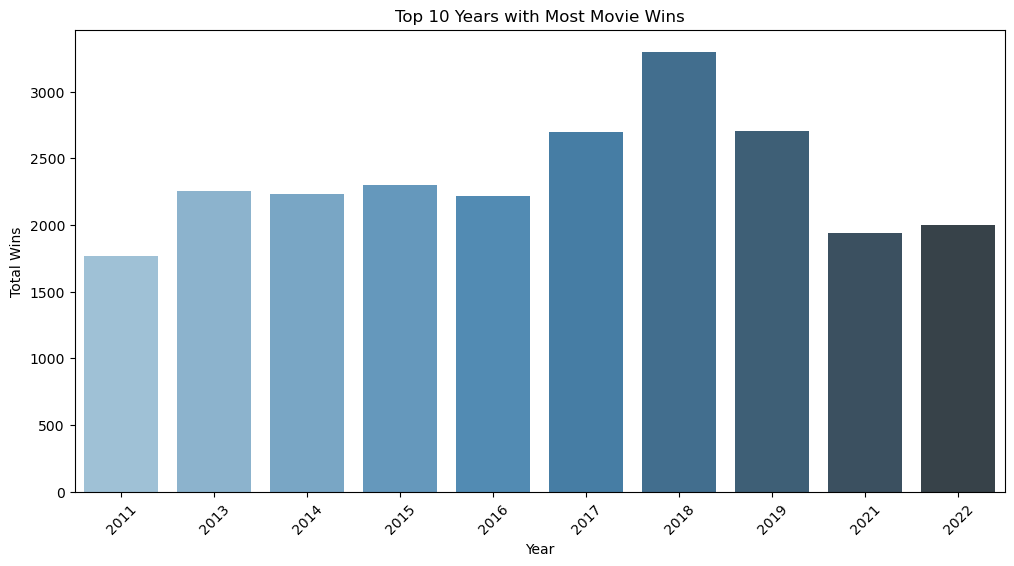

In [12]:
# 10. Top 10 years with the most movie wins (awards)
top_winning_years = all_movies_df.groupby('year')['win'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_winning_years.index, y=top_winning_years.values, palette='Blues_d')
plt.title('Top 10 Years with Most Movie Wins')
plt.xlabel('Year')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

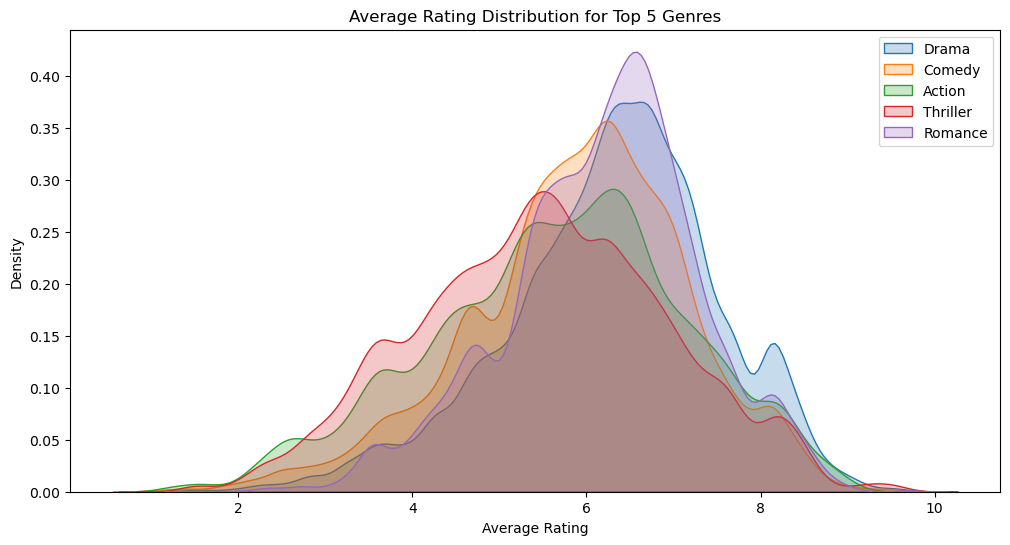

In [13]:
# 11. Average rating distribution for top 5 genres
top_5_genres = list(genre_counts_df.head(5)['Genre'])
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    subset = merged_df[merged_df['genres'].apply(lambda x: genre in x)]
    sns.kdeplot(subset['rating'], label=genre, shade=True)
plt.title('Average Rating Distribution for Top 5 Genres')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

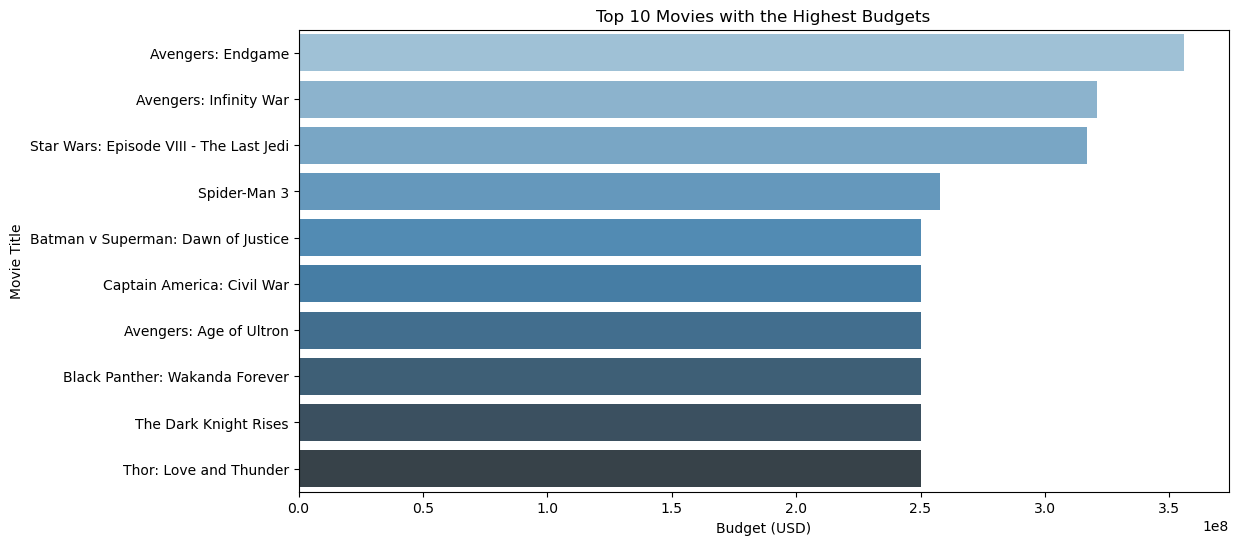

In [14]:
# 12. Analyzing and visualizing the top 10 movies with the highest budgets

top_10_budget_movies = movies_df.sort_values(by='budget_usd', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='budget_usd', y='title', data=top_10_budget_movies, palette='Blues_d')
plt.title('Top 10 Movies with the Highest Budgets')
plt.xlabel('Budget (USD)')
plt.ylabel('Movie Title')
plt.show()

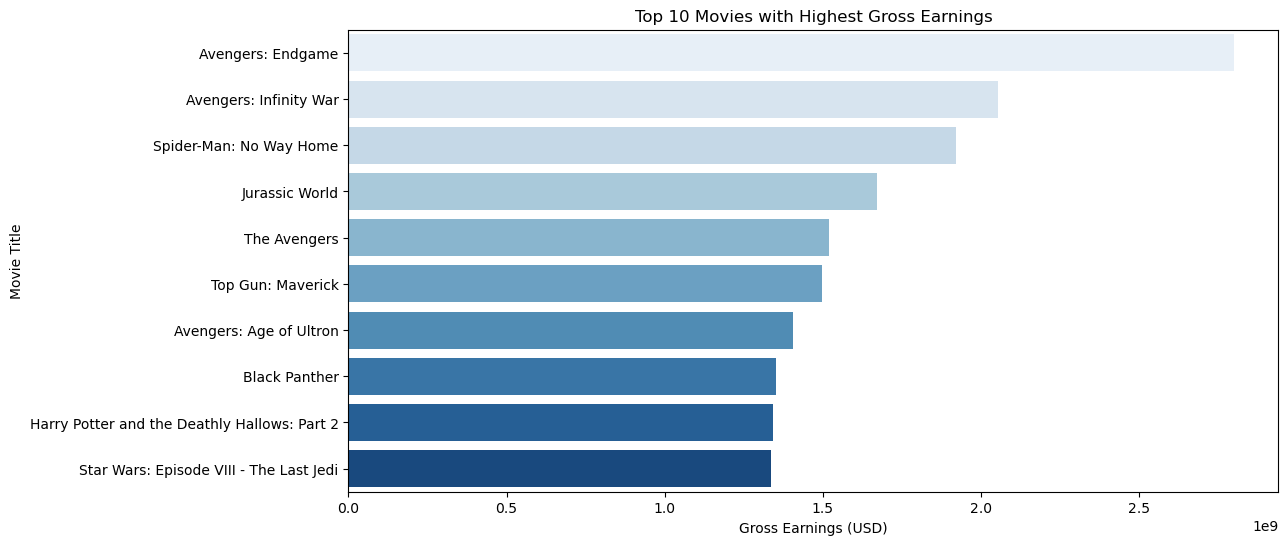

In [15]:
# 13. Top 10 movies with the highest gross earnings
top_grossing_movies = all_movies_df[['title', 'gross_usd']].sort_values(by='gross_usd', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='gross_usd', y='title', data=top_grossing_movies, palette='Blues')
plt.title('Top 10 Movies with Highest Gross Earnings')
plt.xlabel('Gross Earnings (USD)')
plt.ylabel('Movie Title')
plt.show()

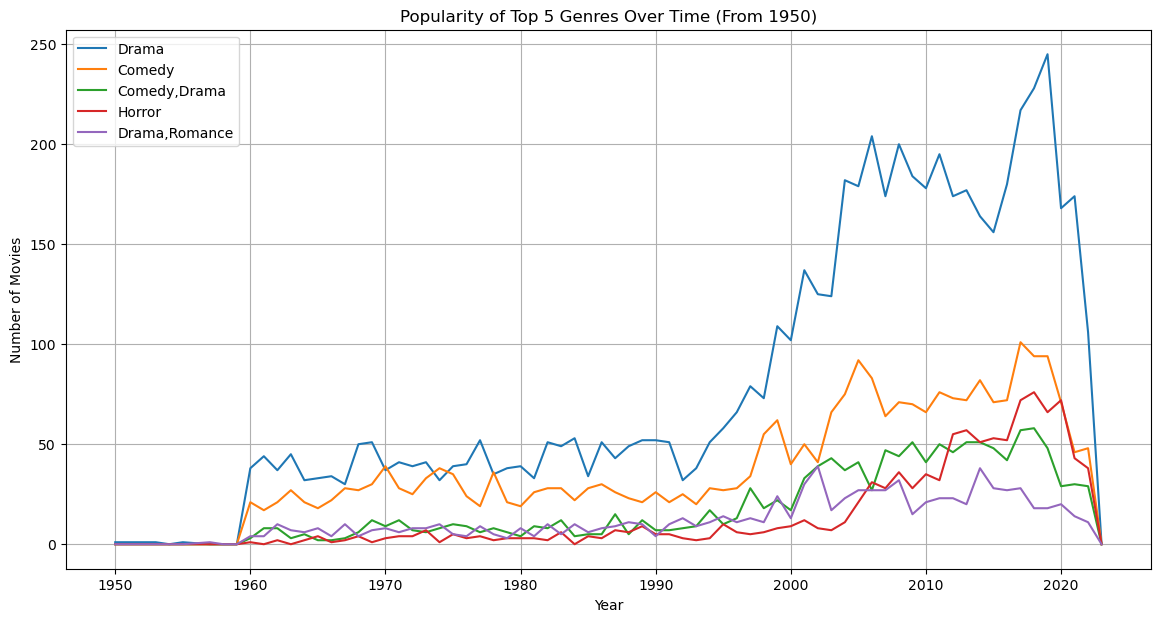

In [16]:
# 14. Top 5 genres over time (from 1950)
genre_yearly = movies_df.explode('genres').groupby(['year', 'genres']).size().unstack().fillna(0)

genre_yearly_from_1950 = genre_yearly[genre_yearly.index >= 1950]

top_genres_from_1950 = genre_yearly_from_1950.sum().nlargest(5).index

top_genres_over_time_from_1950 = genre_yearly_from_1950[top_genres_from_1950]

plt.figure(figsize=(14, 7))
for genre in top_genres_from_1950:
    plt.plot(top_genres_over_time_from_1950.index, top_genres_over_time_from_1950[genre], label=genre)

plt.title('Popularity of Top 5 Genres Over Time (From 1950)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True)
plt.show()


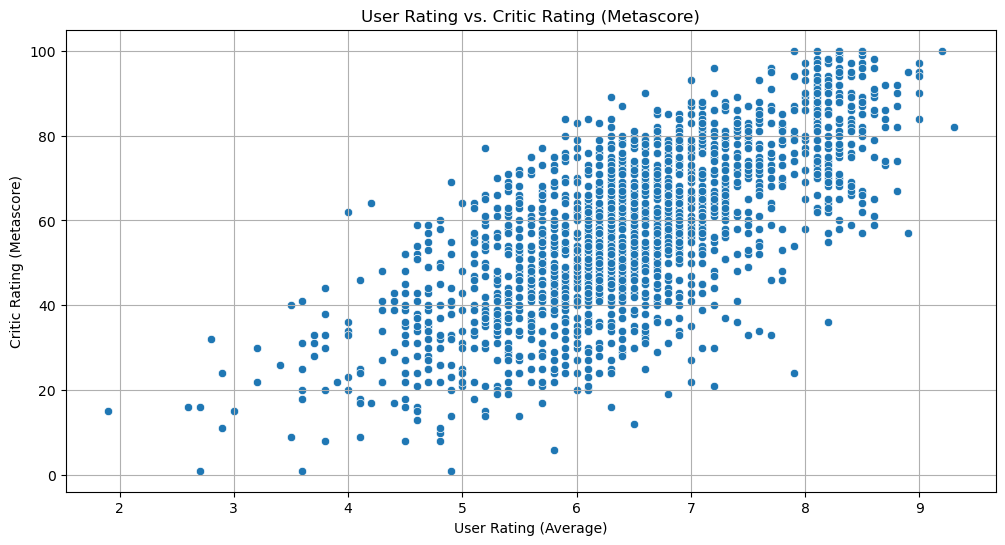

In [17]:
# 15. Analyzing the relationship between user ratings and metascore
# Filtering out movies with available user ratings and metascore
valid_ratings_df = all_movies_df.dropna(subset=['rating', 'metascore'])

# Calculating the correlation between user ratings and metascore
correlation = valid_ratings_df[['rating', 'metascore']].corr()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='rating', y='metascore', data=valid_ratings_df)
plt.title('User Rating vs. Critic Rating (Metascore)')
plt.xlabel('User Rating (Average)')
plt.ylabel('Critic Rating (Metascore)')
plt.grid(True)
plt.show()

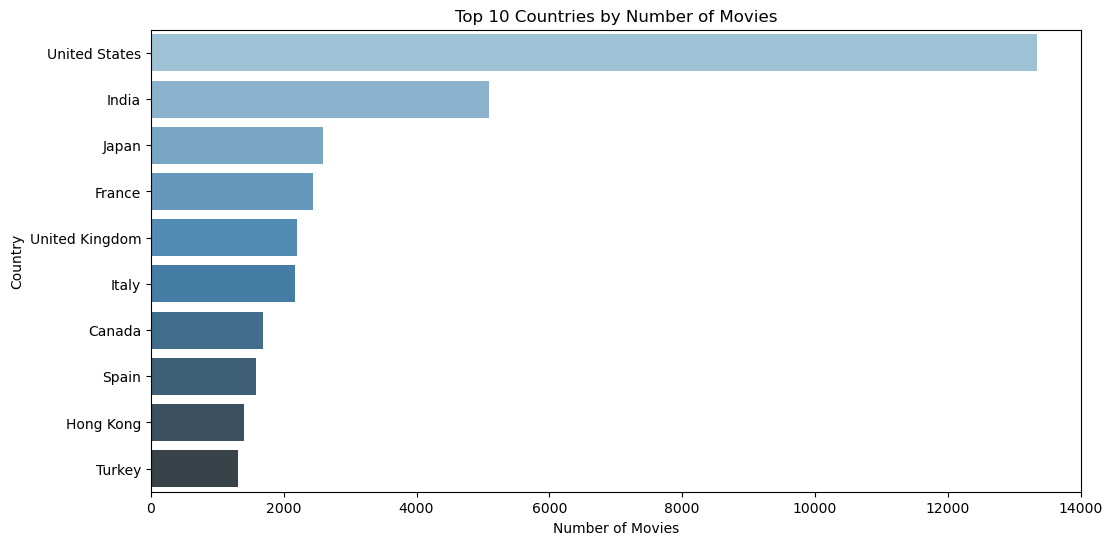

In [18]:
# 16. Analyzing and visualizing the 'country' column from the movies dataset

country_counts = all_movies_df['country'].value_counts()

top_countries = country_counts.head(10)
country_stats = country_counts.describe()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')
plt.title('Top 10 Countries by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()

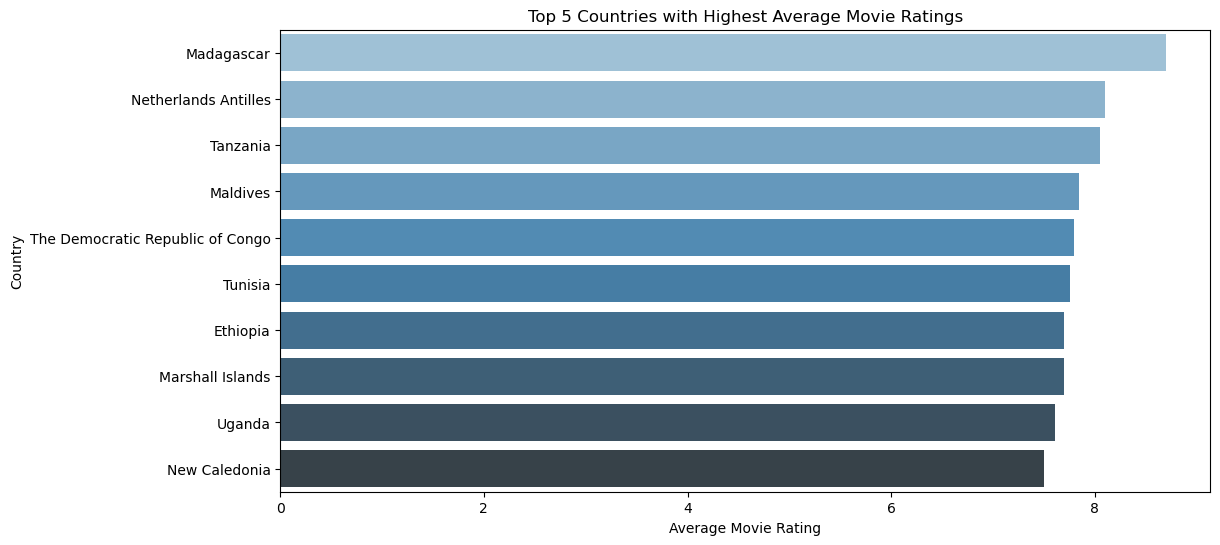

In [19]:
# 17. Analyzing the average ratings of movies from the top 5 countries with the highest average movie ratings

average_ratings_by_country = all_movies_df.groupby('country')['rating'].mean().sort_values(ascending=False)

top_5_countries_high_rating = average_ratings_by_country.head(10)

# Visualizing the top 5 countries with the highest average movie ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_countries_high_rating.values, y=top_5_countries_high_rating.index, palette='Blues_d')
plt.title('Top 5 Countries with Highest Average Movie Ratings')
plt.xlabel('Average Movie Rating')
plt.ylabel('Country')
plt.show()

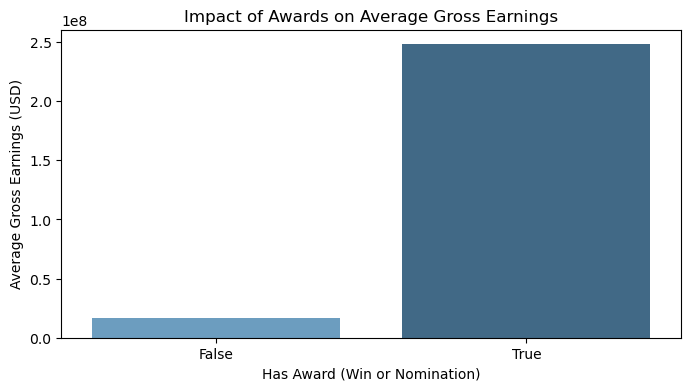

In [20]:
# 18. Analyzing the impact of winning an Oscar award on the average gross earnings of movies
all_movies_df['has_award'] = (all_movies_df['oscar']) > 0
award_impact_on_earnings = all_movies_df.groupby('has_award')['gross_usd'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=award_impact_on_earnings.index, y=award_impact_on_earnings.values, palette='Blues_d')
plt.title('Impact of Awards on Average Gross Earnings')
plt.xlabel('Has Award (Win or Nomination)')
plt.ylabel('Average Gross Earnings (USD)')
plt.show()

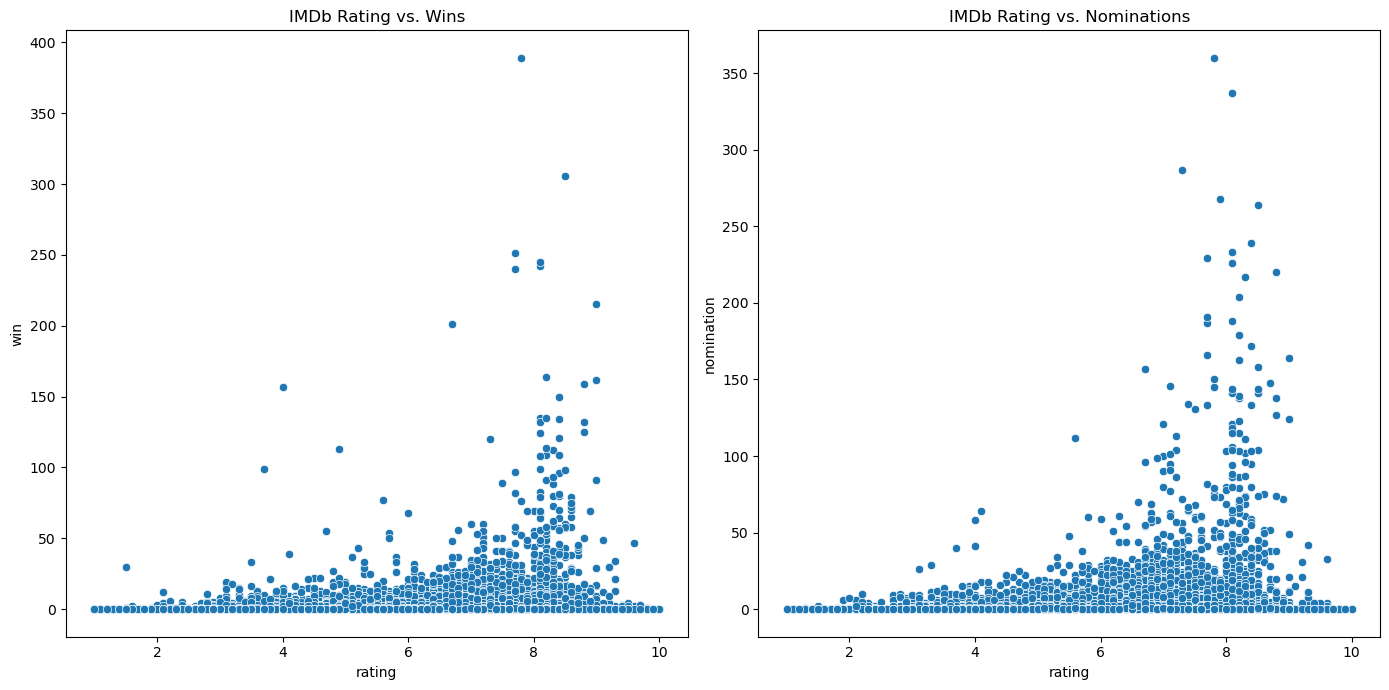

In [21]:
# 19. Analyzing the impact of win and nominations on the movie ratings
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(x='rating', y='win', data=all_movies_df, ax=axes[0], palette='Blues_d')
axes[0].set_title('IMDb Rating vs. Wins')

sns.scatterplot(x='rating', y='nomination', data=all_movies_df, ax=axes[1], palette='Blues_d')
axes[1].set_title('IMDb Rating vs. Nominations')

plt.tight_layout()
plt.show()